In [1]:
import numpy as np
import pandas as pd
import glob
import re
from tqdm import tqdm
import os.path
import collections
from collections import defaultdict
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

folder_prompt_ = "../../../data/OpenAI/PromptsAnalysesData/"

file = "caribbean_df_GT.csv"
df_caribbean_GT = pd.read_csv(F"{folder_prompt_}{file}", header=[0, 1], index_col=0)\
    .rename_axis('Species', axis='index')

file = "caribbean_df_ChatGPT.csv"
df_caribbean_ChatGPT = pd.read_csv(F"{folder_prompt_}{file}", header=[0, 1], index_col=0)\
    .rename_axis('Species', axis='index')

In [3]:
df_caribbean_GT

Life form      Leaf position                      \
                         liana tree     alternate alternate, opposite   
Species                                                                 
Casearia tremula             0    1             1                   0   
Coccoloba uvifera            0    1             1                   0   
Amyris ignea                 0    1             1                   0   
Clusia rosea                 0    1             0                   0   
Coccoloba swartzii           0    1             1                   0   
Avicennia germinans          0    1             0                   0   
Bursera tomentosa            0    1             1                   0   
Bursera simaruba             0    1             1                   0   
Bourreria succulenta         0    1             1                   0   

                                                     \
                     opposite opposite, whorls of 3   
Species                                               
Casearia tremula            0                     0   
Coccoloba uvifera           0                     0   
Amyris ignea                0                     0   
Clusia rosea                1                     0   
Coccoloba swartzii          0                     0   
Avicennia germinans         1                     0   
Bursera tomentosa           0                     0   
Bursera simaruba            0                     0   
Bourreria succulenta        0                     0   

                                                      Leaf composition  \
                     opposite, whorls of 3, alternate        3 palmate   
Species                                                                  
Casearia tremula                                    0                0   
Coccoloba uvifera                                   0                0   
Amyris ignea                                        0                0   
Clusia rosea                                        0                0   
Coccoloba swartzii                                  0                0   
Avicennia germinans                                 0                0   
Bursera tomentosa                                   0                0   
Bursera simaruba                                    0                0   
Bourreria succulenta                                0                0   

                                              ... Aril colour            \
                     3-5 palmate 3-5 pinnate  ...      orange red white   
Species                                       ...                         
Casearia tremula               0           0  ...           1   0     0   
Coccoloba uvifera              0           0  ...           0   0     0   
Amyris ignea                   0           0  ...           0   0     0   
Clusia rosea                   0           0  ...           1   0     0   
Coccoloba swartzii             0           0  ...           0   0     0   
Avicennia germinans            0           0  ...           0   0     0   
Bursera tomentosa              0           0  ...           0   0     0   
Bursera simaruba               0           0  ...           0   0     0   
Bourreria succulenta           0           0  ...           0   0     0   

                                 Seed colour                                 
                     yellow-geen       black brown green grey white whitish  
Species                                                                      
Casearia tremula               0           1     0     0    0     0       0  
Coccoloba uvifera              0           1     0     0    0     0       0  
Amyris ignea                   0           0     0     0    0     0       0  
Clusia rosea                   0           0     0     0    0     0       0  
Coccoloba swartzii             0           1     0     0    0     0       0  
Avicennia germinans            0           0     0     1    0     0  

In [4]:
df_caribbean_ChatGPT

Life form      Leaf position                      \
                         liana tree     alternate alternate, opposite   
Species                                                                 
Casearia tremula           NaN  NaN           NaN                 NaN   
Coccoloba uvifera          NaN  1.0           1.0                 NaN   
Amyris ignea               NaN  1.0           NaN                 NaN   
Clusia rosea               NaN  1.0           NaN                 NaN   
Coccoloba swartzii         NaN  1.0           1.0                 NaN   
Avicennia germinans        NaN  1.0           NaN                 NaN   
Bursera tomentosa          NaN  NaN           1.0                 NaN   
Bursera simaruba           NaN  1.0           NaN                 NaN   
Bourreria succulenta       NaN  1.0           1.0                 NaN   

                                                     \
                     opposite opposite, whorls of 3   
Species                                               
Casearia tremula          NaN                   NaN   
Coccoloba uvifera         NaN                   NaN   
Amyris ignea              NaN                   NaN   
Clusia rosea              1.0                   NaN   
Coccoloba swartzii        NaN                   NaN   
Avicennia germinans       1.0                   NaN   
Bursera tomentosa         NaN                   NaN   
Bursera simaruba          NaN                   NaN   
Bourreria succulenta      NaN                   NaN   

                                                      Leaf composition  \
                     opposite, whorls of 3, alternate        3 palmate   
Species                                                                  
Casearia tremula                                  NaN              NaN   
Coccoloba uvifera                                 NaN              NaN   
Amyris ignea                                      NaN              NaN   
Clusia rosea                                      NaN              NaN   
Coccoloba swartzii                                NaN              NaN   
Avicennia germinans                               NaN              NaN   
Bursera tomentosa                                 NaN              NaN   
Bursera simaruba                                  NaN              NaN   
Bourreria succulenta                              NaN              NaN   

                                              ... Aril colour             \
                     3-5 palmate 3-5 pinnate  ...      orange  red white   
Species                                       ...                          
Casearia tremula             NaN         NaN  ...         NaN  1.0   NaN   
Coccoloba uvifera            NaN         NaN  ...         NaN  NaN   NaN   
Amyris ignea                 NaN         NaN  ...         NaN  NaN   NaN   
Clusia rosea                 NaN         NaN  ...         NaN  1.0   NaN   
Coccoloba swartzii           NaN         NaN  ...         NaN  1.0   NaN   
Avicennia germinans          NaN         NaN  ...         NaN  NaN   NaN   
Bursera tomentosa            NaN         NaN  ...         NaN  1.0   NaN   
Bursera simaruba             NaN         NaN  ...         NaN  1.0   NaN   
Bourreria succulenta         NaN         NaN  ...         1.0  1.0   NaN   

                                 Seed colour                                 
                     yellow-geen       black brown green grey white whitish  
Species                                                                      
Casearia tremula             NaN         NaN   NaN   NaN  NaN   NaN     NaN  
Coccoloba uvifera            NaN         NaN   NaN   NaN  NaN   NaN     NaN  
Amyris ignea                 NaN         NaN   NaN   NaN  NaN   NaN     NaN  
Clusia rosea                 NaN         1.0   NaN   NaN  NaN   NaN     NaN  
Coccoloba swartzii           NaN         NaN   NaN   NaN  NaN   NaN     NaN  
Avicennia germinans          NaN         NaN   NaN   NaN 

In [5]:
df_caribbean_GT.head().loc[:, 'Life form']

,liana,tree
Species,,
Casearia tremula,0,1
Coccoloba uvifera,0,1
Amyris ignea,0,1
Clusia rosea,0,1
Coccoloba swartzii,0,1


In [6]:
df_caribbean_ChatGPT.head().loc[:, 'Life form']

,liana,tree
Species,,
Casearia tremula,NaN,NaN
Coccoloba uvifera,NaN,1.0
Amyris ignea,NaN,1.0
Clusia rosea,NaN,1.0
Coccoloba swartzii,NaN,1.0


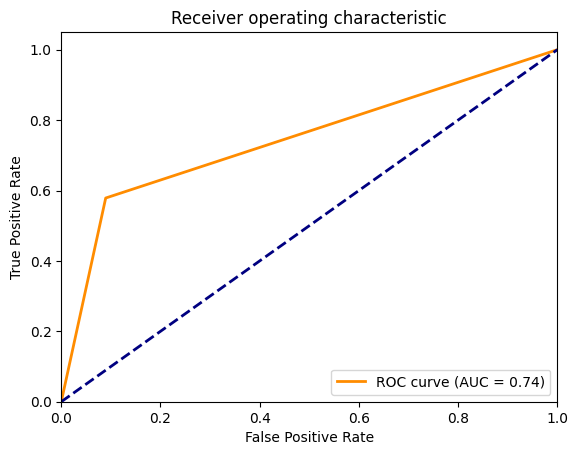

In [7]:
# Concatenate the two DataFrames along the rows
df_concat = pd.concat([df_caribbean_GT, df_caribbean_ChatGPT], axis=0, keys=['ground_truth', 'predicted'])
# Create a column with predicted probabilities based on which DataFrame the label came from
df_concat = df_concat.assign(proba=np.nan)
df_concat.loc[('ground_truth', slice(None)), 'proba'] = 0
df_concat.loc[('predicted', slice(None)), 'proba'] = 1

# Fill missing values with the most frequent value (mode)
df_concat = df_concat.fillna(df_concat.mode().iloc[0])

# Flatten the binary labels into a single array
y_true = df_concat.loc['ground_truth', :].values.flatten()
y_pred = df_concat.loc['predicted', :].values.flatten()

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

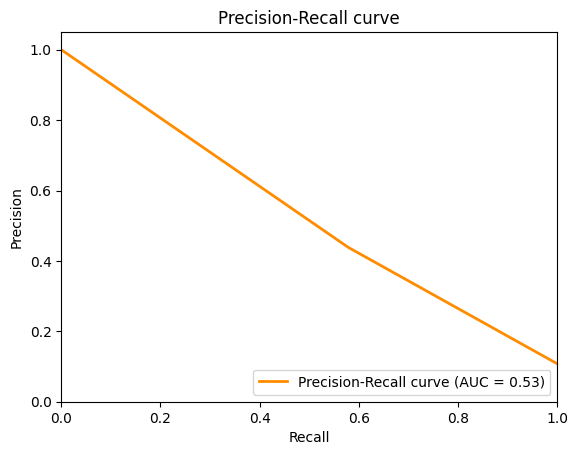

In [8]:
# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Calculate the AUC for the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

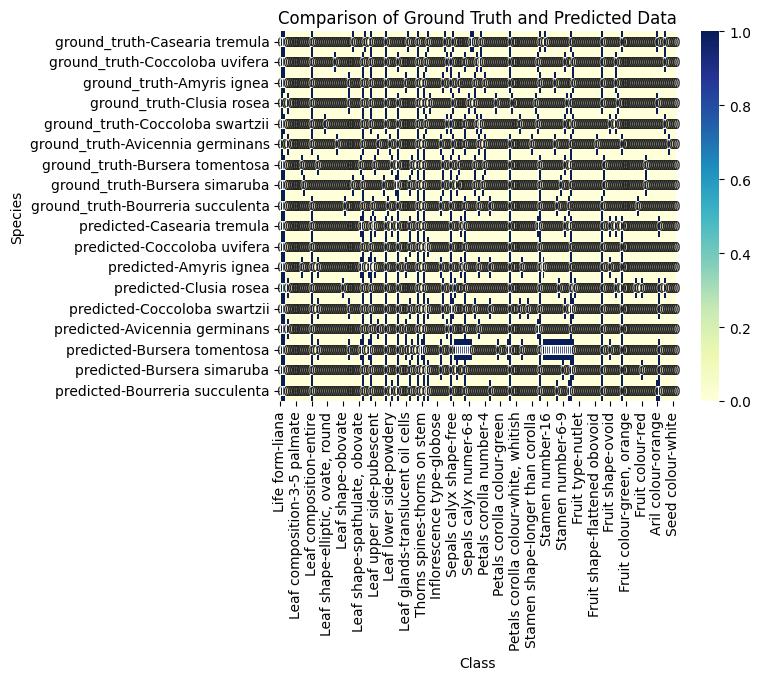

In [17]:
# Concatenate the two DataFrames along the rows
df_concat = pd.concat([df_caribbean_GT, df_caribbean_ChatGPT], axis=0, keys=['ground_truth', 'predicted'])

# Fill missing values with the most frequent value (mode)
df_concat = df_concat.fillna(df_concat.mode().iloc[0])

# Create a heatmap to compare the two dataframes
sns.heatmap(df_concat, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Comparison of Ground Truth and Predicted Data')
plt.xlabel('Class')
plt.ylabel('Species')
plt.show()

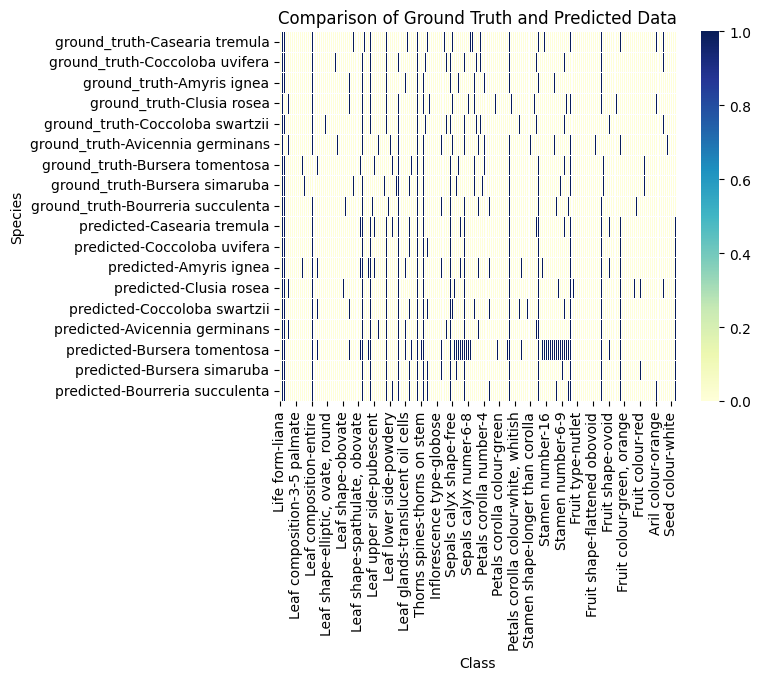

In [16]:

# Create a heatmap to compare the two dataframes
sns.heatmap(df_concat, annot=False, fmt='g', cmap='YlGnBu',
            square=False, linewidths=.5)
plt.title('Comparison of Ground Truth and Predicted Data')
plt.xlabel('Class')
plt.ylabel('Species')
plt.show()